In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
lien='https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv' # source des données

In [3]:
data=pd.read_csv(lien)

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.isna().sum() # verification des valeurs manquantes

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
X=data.drop("charges",axis=1)
y=np.log(data.charges)
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


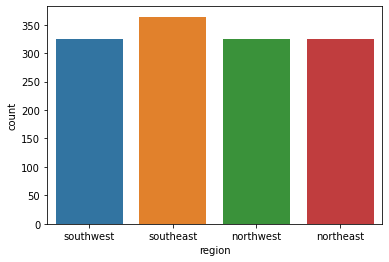

In [8]:
sns.countplot(x=X.region,data=X);

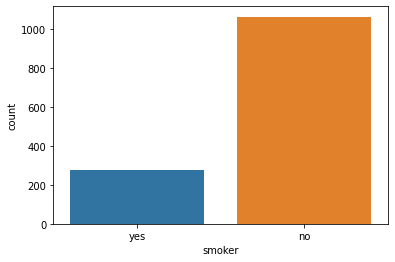

In [9]:
sns.countplot(x=X.smoker,data=X);# ous avonns données déquéquilibrées

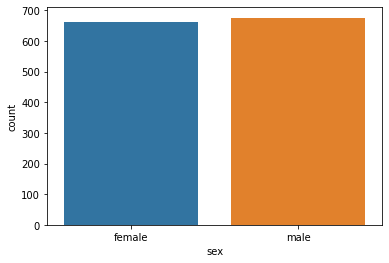

In [10]:
sns.countplot(x=X.sex,data=X)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [12]:
X=pd.get_dummies(X,drop_first=True) # encodage des donnes avec pandas
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


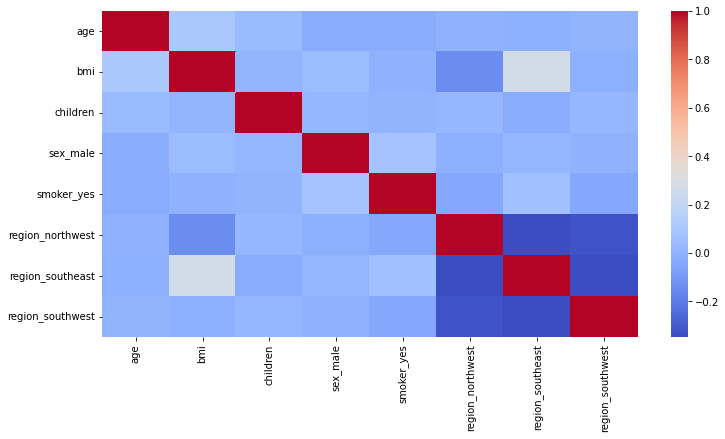

In [13]:
plt.subplots(figsize=(12,6))
sns.heatmap(X.corr(),cmap='coolwarm')

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=101,test_size=0.25) # division des données en test et en entrainement

In [15]:
X_train.shape,y_train.shape

((1003, 8), (1003,))

In [16]:
from sklearn.preprocessing import MinMaxScaler  # standardisation des données

In [17]:
scaler=MinMaxScaler().fit(X_train)

In [18]:
X_train_sc=scaler.transform(X_train) 
X_test_sc=scaler.transform(X_test)

In [19]:
from tensorflow.keras.layers import Dense,Dropout 
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
model=Sequential()

model.add(Dense(units=150,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=150,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=100,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='relu'))

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'],)

In [34]:
model.fit(X_train_sc,y_train,epochs=50,validation_data=(X_test_sc,y_test))

Epoch 1/50
32/32 [==============================] - 1s 9ms/step - loss: 44.9998 - mae: 6.0822 - val_loss: 8.1194 - val_mae: 2.3687
Epoch 2/50
32/32 [==============================] - 0s 4ms/step - loss: 4.7481 - mae: 1.7015 - val_loss: 1.4679 - val_mae: 0.9153
Epoch 3/50
32/32 [==============================] - 0s 5ms/step - loss: 2.4937 - mae: 1.2424 - val_loss: 1.1295 - val_mae: 0.7878
Epoch 4/50
32/32 [==============================] - 0s 5ms/step - loss: 1.9938 - mae: 1.1202 - val_loss: 0.5035 - val_mae: 0.5210
Epoch 5/50
32/32 [==============================] - 0s 4ms/step - loss: 1.6921 - mae: 1.0208 - val_loss: 0.4081 - val_mae: 0.4720
Epoch 6/50
32/32 [==============================] - 0s 4ms/step - loss: 1.3859 - mae: 0.9225 - val_loss: 0.3626 - val_mae: 0.4475
Epoch 7/50
32/32 [==============================] - 0s 6ms/step - loss: 1.4222 - mae: 0.9560 - val_loss: 0.3171 - val_mae: 0.4046
Epoch 8/50
32/32 [==============================] - 0s 4ms/step - loss: 1.2722 - mae: 0.9

In [35]:
loss=pd.DataFrame(model.history.history)
loss.columns

Index(['loss', 'mae', 'val_loss', 'val_mae'], dtype='object')

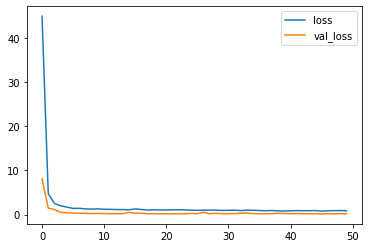

In [36]:
loss[['loss', 'val_loss']].plot()

In [37]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error

In [38]:
print('Pour les données de test :',y_test.describe()[1:3]),
print("Pour les données d'entrainement: ",y_train.describe()[1:3])

Pour les données de test : mean    9.072463
std     0.915519
Name: charges, dtype: float64
Pour les données d'entrainement:  mean    9.107408
std     0.921151
Name: charges, dtype: float64


In [39]:
pred=model.predict(X_test_sc) # prediction sur les données de test

In [40]:
np.sqrt(mean_squared_error(y_test,pred)) # si on compare par rapport au std on constate une amélioration par rapport aux données initiales

0.3895655661816156

In [41]:
np.sqrt(mean_squared_error(y_test,pred))*100/y_test.mean() #% d'erreur par rapport à la moyenne

4.293934039593976

In [42]:
mean_absolute_error(y_test,model.predict(X_test_sc))

0.23384319659387734

In [43]:
model.evaluate(x=X_test_sc,y=y_test)

11/11 [==============================] - 0s 2ms/step - loss: 0.1518 - mae: 0.2338


[0.15176132321357727, 0.23384317755699158]